In [82]:
import pandas as pd
import numpy as np
import seaborn as sys
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
import re
from uszipcode import SearchEngine
import googlemaps
import matplotlib.pyplot as plt
np.random.seed(0)

In [83]:
# Data loader
# combine = pd.read_csv('combine.csv') 
# tax_income = pd.read_csv("revised_tax_income.csv")
df = pd.read_csv("Crime_Data_from_2010_to_Present.csv")
# df = df.drop_duplicates()

In [84]:
tax_income_2014 = tax_income[tax_income["Taxable Year"] == 2014]
merged = pd.merge(left=combine,right=tax_income_2014, left_on="ZIP_CODE", right_on='Zip Code',how="inner")

df["DATE OCC"] = pd.to_datetime(df['DATE OCC'])
df['YEAR']=df["DATE OCC"].dt.year
df['MONTH']=df['DATE OCC'].dt.month
df['Day_of_Week']=df['DATE OCC'].apply(lambda x:x.weekday())
df['HOUR']=df['TIME OCC']//100

## Histogram for tax income and number of crime respect to locations in LA

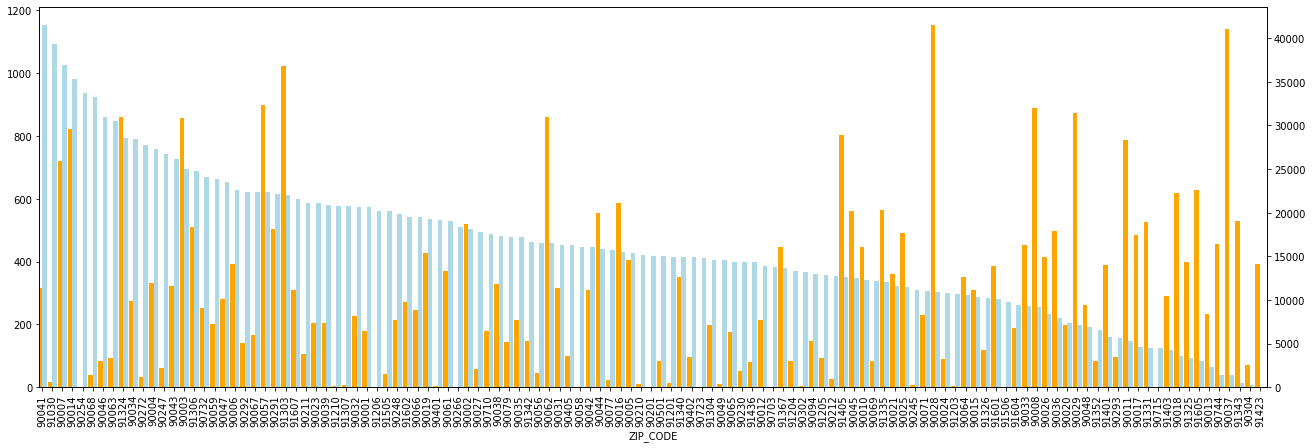

In [77]:

loc_group = merged.groupby("ZIP_CODE")["DR_NO"].count()
loc_group.to_frame()
merged_zip = loc_group.index.unique()
merge_return = tax_income_2014[tax_income_2014["Zip Code"].isin(merged_zip)]
merge_return.sort_values(by='Zip Code', ascending=False)
histo_data = pd.DataFrame({"ZIP_CODE": loc_group.index, "CRIME_COUNT": loc_group.values, "TAX_INCOME": merge_return["Returns"] })
fig = plt.figure(figsize = (22,7))

histo_data = histo_data.sort_values(by="TAX_INCOME", ascending=False)
width = 0.45
histo_data.index = histo_data["ZIP_CODE"]
ax = fig.add_subplot(111)
ax2 = ax.twinx()
histo_data.CRIME_COUNT.plot(kind='bar', color='orange', ax=ax, width=width, position=1)
histo_data.TAX_INCOME.plot(kind='bar', color='lightblue', ax=ax2, width=width, position=0)


In [85]:
# data = df[["DR_NO", "AREA ","AREA NAME", "DATE OCC", "Crm Cd","LAT", "LON","YEAR"]].dropna()
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,YEAR,MONTH,Day_of_Week,HOUR
0,1307355,02/20/2010 12:00:00 AM,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,2010,2,5,13
1,11401303,09/13/2010 12:00:00 AM,2010-09-12,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010,9,6,0
2,70309629,08/09/2010 12:00:00 AM,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,2010,8,0,15
3,90631215,01/05/2010 12:00:00 AM,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010,1,1,1
4,100100501,01/03/2010 12:00:00 AM,2010-01-02,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090729,190608903,03/28/2019 12:00:00 AM,2019-03-28,400,6,Hollywood,644,1,648,ARSON,...,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490,2019,3,3,4
2090730,190715222,08/15/2019 12:00:00 AM,2019-08-14,1810,7,Wilshire,701,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),...,NaN,NaN,WILLOUGHBY AV,ORLANDO AV,34.0871,-118.3732,2019,8,2,18
2090731,192004409,01/06/2019 12:00:00 AM,2019-01-06,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870,2019,1,6,21
2090732,191716777,10/17/2019 12:00:00 AM,2019-10-16,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085,2019,10,2,18


### Scatter plots for number of crime in different locations for all years (all cirme + murder crime)

/anaconda3/envs/15688/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


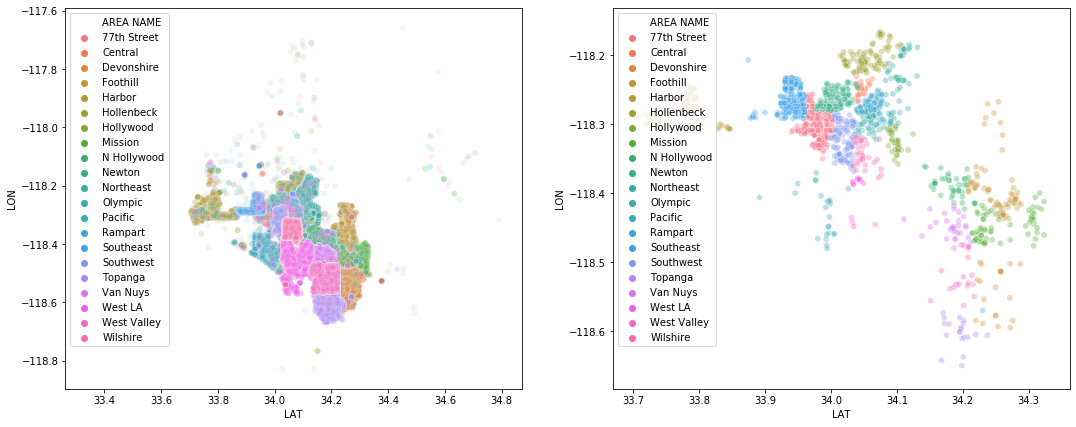

In [89]:
# security measurement
fig, axes = plt.subplots(1,2, figsize = (18,7))
data.LAT.replace(0, None, inplace=True)
data.LON.replace(0, None, inplace=True)

kill_data = data[data["Crm Cd"] == 110]
data.sort_values(by=['AREA NAME'], inplace=True)
kill_data.sort_values(by=["AREA NAME"], inplace=True)
# all crime over 10 years location distribution
sys.scatterplot(x = "LAT",  y= "LON", hue = "AREA NAME", alpha= 0.10, data = data, ax = axes[0])
# kill crime over 10 years location distribution
sys.scatterplot(x = "LAT",  y= "LON", hue = "AREA NAME", alpha= 0.35, data = kill_data, ax = axes[1])

In [97]:
map_data = df[["DR_NO","AREA ", "Crm Cd","LON", "LAT"]]
map_data = map_data[map_data["Crm Cd"]==110]

### Number of serious crime (110) in LA visualizaed on map

In [98]:
start_lat, start_long = map_data["LAT"].mean(), map_data["LON"].mean()
map_sample = folium.Map(location = [map_data["LAT"].mean(), map_data['LON'].mean()])
mark = MarkerCluster()
for row in map_data.itertuples():
    mark.add_child(folium.Marker(location = [row.LAT, row.LON]))
map_sample.add_child(mark)

In [103]:
# map_data_multi = df[["DR_NO","AREA ", "Crm Cd", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3","Crm Cd 4","LON", "LAT"]].dropna()
map_data_multi = df[["DR_NO","AREA ", "Crm Cd", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3","Crm Cd 4","LON", "LAT"]]
temp = map_data_multi[map_data_multi["Crm Cd 2"] == 998]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110333 entries, 3 to 2090727
Data columns (total 9 columns):
DR_NO       110333 non-null int64
AREA        110333 non-null int64
Crm Cd      110333 non-null int64
Crm Cd 1    110333 non-null float64
Crm Cd 2    110333 non-null float64
Crm Cd 3    40 non-null float64
Crm Cd 4    0 non-null float64
LON         110333 non-null float64
LAT         110333 non-null float64
dtypes: float64(6), int64(3)
memory usage: 8.4 MB


### Number of crime involving 4 types of crime over 10 years

In [104]:
start_lat, start_long = map_data_multi["LAT"].mean(), map_data_multi["LON"].mean()
map_sample_multi = folium.Map(location = [map_data_multi["LAT"].mean(), map_data_multi['LON'].mean()])
mark = MarkerCluster()
for row in map_data_multi.itertuples():
    mark.add_child(folium.Marker(location = [row.LAT, row.LON]))
map_sample_multi.add_child(mark)

KeyboardInterrupt: 

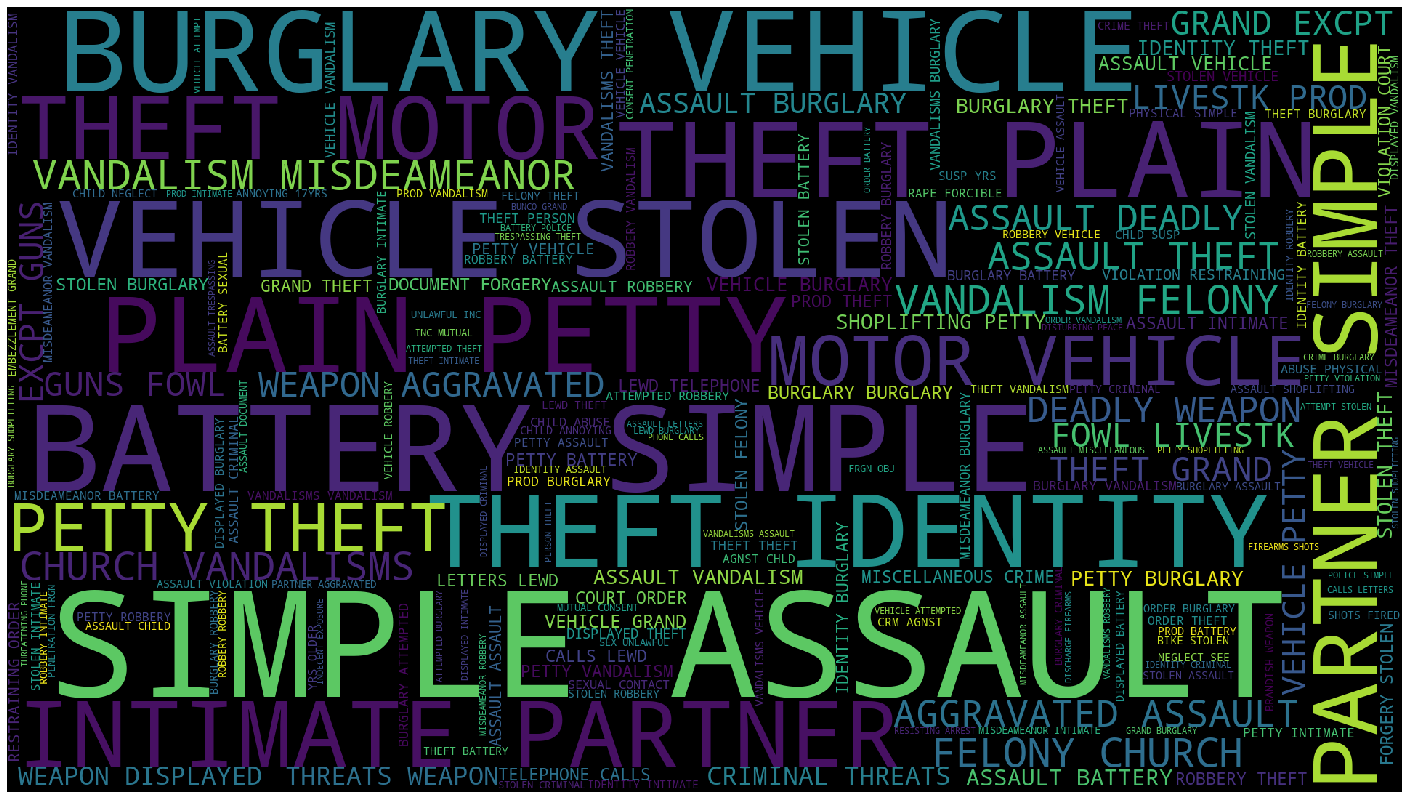

In [25]:
# Word Cloud
plt.figure(figsize = (25, 15))
temp_word = " ".join(df["Crm Cd Desc"].tolist())
word_cloud = WordCloud(
        background_color = "black",
        width = 1920,
        height= 1080
    ).generate(temp_word)
plt.imshow(word_cloud)
plt.axis("off")
plt.savefig("graph.png")
plt.show()